<a href="https://colab.research.google.com/github/ianara01/Park-Sangjin/blob/master/stock_buysellwait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 2.0 MB/s eta 0:00:00


In [17]:
# 여러 개 기업 정보 가져오기

import FinanceDataReader as fdr

stocks = fdr.StockListing('KOSPI')  # 커스피 940 종목

In [5]:
stocks.head()  #  원본은 두고 원하는 부분만 뽑아 사용

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,59400,2,-200,-0.34,59100,59700,58900,5679130,336535802600,354605083470000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,191100,1,800,0.42,190200,192100,189400,573837,109574879900,139121251951500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,417000,1,8000,1.96,406500,417000,405000,34506,14203459500,97578000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,1031000,2,-16000,-1.53,1036000,1046000,1029000,10958,11321561000,73380394000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,224000,3,0,0.00,223000,225000,223000,51073,11425983000,46909226784000,209416191,STK


In [18]:
stocks_df = stocks[['Code', 'Name']]

In [19]:
# data 가져오기
for tmp in stocks_df.iterrows():
  print(tmp)
  break

(0, Code    005930
Name      삼성전자
Name: 0, dtype: object)


In [22]:
# tmp[0]은 index

tmp[1].Name

'삼성전자'

In [23]:
# enumerate는 앞에 index 준다
for idx, num in enumerate(range(5)):
  print(idx, num)

0 0
1 1
2 2
3 3
4 4


In [24]:
import time
from tqdm.auto import tqdm

for i in tqdm(range(5)):
  time.sleep
  break

  0%|          | 0/5 [00:00<?, ?it/s]

In [27]:
%%time
company_list = []
for idx, company in stocks_df.iterrows():
  company_list.append((company.Code, company.Name))
  #print(company.Code, company.Name)
  break

CPU times: user 406 µs, sys: 0 ns, total: 406 µs
Wall time: 412 µs


In [31]:
company_dict_comp = {company.Name:company.Code for idx, company in stocks_df.iterrows()}

In [34]:
company_list = list(company_dict_comp.keys())

# 기업 데이터 가져오기
# 머신 러닝
# 평가

In [35]:
company_code = '005930'

company_stock = fdr.DataReader(company_code)

In [39]:
def get_company_stock(company_code):
  company_stock = fdr.DataReader(company_code)
  return company_stock

In [40]:
company_code = '005930'
company_data = get_company_stock(company_code)
company_data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-07-07,7340,7460,7230,7360,811625,NaN
2000-07-10,7440,7630,7410,7600,850172,0.032609
2000-07-11,7580,7740,7450,7450,698992,-0.019737
2000-07-12,7520,7660,7460,7640,802868,0.025503
2000-07-13,7699,7880,7570,7760,976116,0.015707
...,...,...,...,...,...,...
2024-10-24,58200,58500,56600,56600,31499922,-0.042301
2024-10-25,56000,56900,55800,55900,25829315,-0.012367
2024-10-28,55700,58500,55700,58100,27775009,0.039356


데이터 전처리, 모델 학습 평가

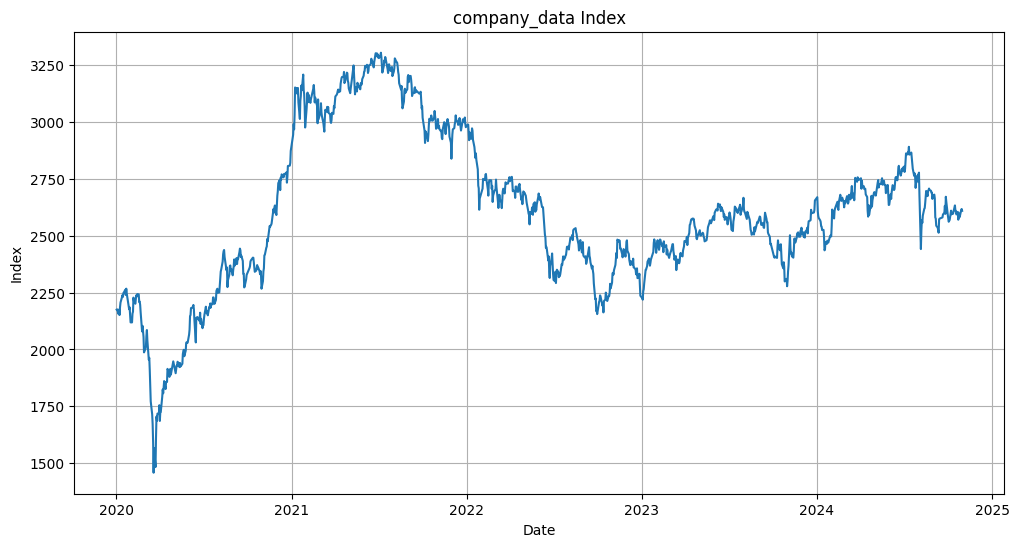

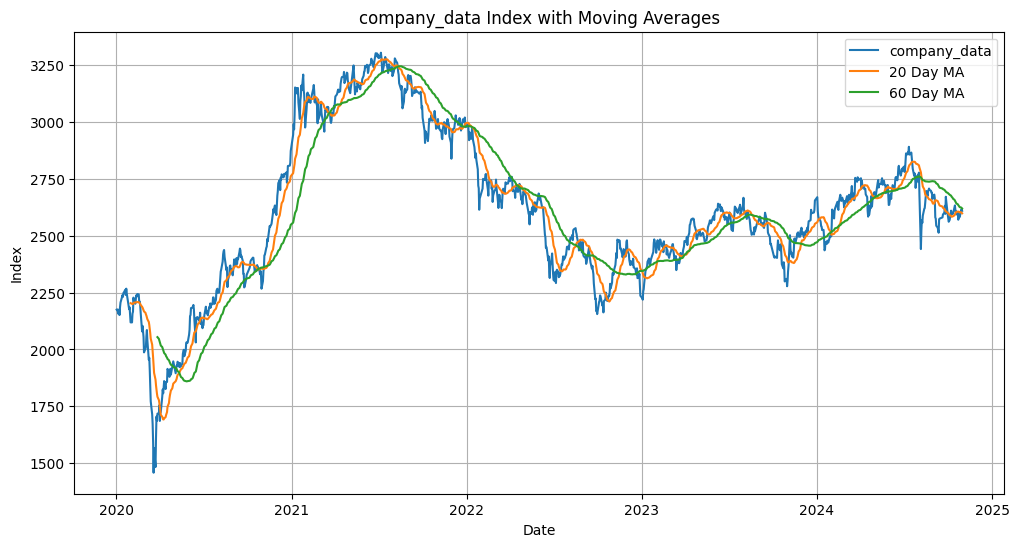

In [41]:
import matplotlib.pyplot as plt

# 특정 기간 company_data 지수 분석
company_data = fdr.DataReader('KS11', '2020')

# 종가 기준 차트 그리기
plt.figure(figsize=(12, 6))
plt.plot(company_data.index, company_data['Close'])
plt.title('company_data Index')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)
plt.show()

# 이동평균선 추가
company_data['MA20'] = company_data['Close'].rolling(window=20).mean()
company_data['MA60'] = company_data['Close'].rolling(window=60).mean()

plt.figure(figsize=(12, 6))
plt.plot(company_data.index, company_data['Close'], label='company_data')
plt.plot(company_data.index, company_data['MA20'], label='20 Day MA')
plt.plot(company_data.index, company_data['MA60'], label='60 Day MA')
plt.title('company_data Index with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Index')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
company_data

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,MA20,MA60
Date,,,,,,,,,,,,
2020-01-02,2201.21,2202.32,2171.84,2175.17,494677752,-0.0102,2,-22.50,4638167309579,1461424793589993,NaN,NaN
2020-01-03,2192.58,2203.38,2165.39,2176.46,631562785,0.0006,1,1.29,5763662746548,1462298971774498,NaN,NaN
2020-01-06,2154.97,2164.42,2149.95,2155.07,592670719,-0.0098,2,-21.39,5156540935534,1448385085188395,NaN,NaN
2020-01-07,2166.60,2181.62,2164.27,2175.54,568235609,0.0095,1,20.47,5143511908278,1462298814406954,NaN,NaN
2020-01-08,2156.27,2162.32,2137.72,2151.31,913830628,-0.0111,2,-24.23,8750722208310,1446631314388659,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-24,2591.69,2600.26,2578.80,2581.03,343098218,-0.0072,2,-18.59,9733937488291,2104042768297716,2605.0660,2628.790667
2024-10-25,2597.44,2611.27,2577.00,2583.27,462898403,0.0009,1,2.24,10286877485946,2105651493083676,2602.6455,2625.866667
2024-10-28,2588.45,2612.96,2587.20,2612.43,333735957,0.0113,1,29.16,9133006346665,2129841276048609,2603.4510,2624.229667


In [45]:
# 예측할 레이블 생성 (다음날 가격이 오르면 1, 아니면 0), machine learning 하기 위해서 label 생성이 중요
# x값들만 data로 받아왔지만 y값들은 없는 상태, label을 만들어 (고민 필요) 생성

company_data['Target'] = (company_data['Close'].shift(-1) > company_data['Close']).astype(int)

In [44]:
company_data

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,MA20,MA60,Target
Date,,,,,,,,,,,,,
2020-01-02,2201.21,2202.32,2171.84,2175.17,494677752,-0.0102,2,-22.50,4638167309579,1461424793589993,NaN,NaN,1
2020-01-03,2192.58,2203.38,2165.39,2176.46,631562785,0.0006,1,1.29,5763662746548,1462298971774498,NaN,NaN,0
2020-01-06,2154.97,2164.42,2149.95,2155.07,592670719,-0.0098,2,-21.39,5156540935534,1448385085188395,NaN,NaN,1
2020-01-07,2166.60,2181.62,2164.27,2175.54,568235609,0.0095,1,20.47,5143511908278,1462298814406954,NaN,NaN,0
2020-01-08,2156.27,2162.32,2137.72,2151.31,913830628,-0.0111,2,-24.23,8750722208310,1446631314388659,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-24,2591.69,2600.26,2578.80,2581.03,343098218,-0.0072,2,-18.59,9733937488291,2104042768297716,2605.0660,2628.790667,1
2024-10-25,2597.44,2611.27,2577.00,2583.27,462898403,0.0009,1,2.24,10286877485946,2105651493083676,2602.6455,2625.866667,1
2024-10-28,2588.45,2612.96,2587.20,2612.43,333735957,0.0113,1,29.16,9133006346665,2129841276048609,2603.4510,2624.229667,1


In [47]:
# 결측치 확인
print(" 결측치 확인 ")
print(company_data.isnull().sum())

 결측치 확인 
Open       0
High       0
Low        0
Close      0
Volume     0
Change     0
UpDown     0
Comp       0
Amount     0
MarCap     0
MA20      19
MA60      59
Target     0
dtype: int64


In [48]:
company_df = company_data.dropna()

In [49]:
# 특성과 타깃 분리
X = company_df.drop('Target', axis =1)
y = company_df['Target']

In [50]:
# train_test  분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [51]:
! pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 2.7 MB/s eta 0:00:00


In [57]:
from tabpfn import TabPFNClassifier

# TabPFN 모델 생성
classifier = TabPFNClassifier(
    device = 'cpu',
    N_ensemble_configurations=32
)

We have to download the TabPFN, as there is no checkpoint at  /usr/local/lib/python3.10/dist-packages/tabpfn/models_diff/prior_diff_real_checkpoint_n_0_epoch_100.cpkt
It has about 100MB, so this might take a moment.


/usr/local/lib/python3.10/dist-packages/tabpfn/scripts/model_builder.py:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state, optimizer_state, config_sample = torch

In [58]:
# 모델 학습
classifier.fit(X_train, y_train)

TabPFNClassifier(N_ensemble_configurations=32)